<a href="https://colab.research.google.com/github/comaraDOTcom/100-days-of-code/blob/master/Week-5/ET5003_KaggleCompetition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [ ]:
#@title Current Date
Today = '2021-10-17' #@param {type:"date"}


In [12]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "3" #@param {type:"string"}
Student_ID_Name = "Conor O'Mara 20151845" #@param {type:"string"}
Student_ID_Name = "Morgan Lynch" #@param {type:"string"}
Student_ID_Name = "Aziz Aoudjit" #@param {type:"string"}
#@markdown ---

In [15]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = "Final" #@param ["Draft", "Final"]
Submission = True #@param {type:"boolean"}

# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [ ]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture

In [2]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [20]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

In [21]:
!pip install gpy

     |████████████████████████████████| 959 kB 10.6 MB/s 
     |████████████████████████████████| 71 kB 7.3 MB/s 
  Created wheel for gpy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565151 sha256=e73379b61bb9a7e2d978fc667ba0888a724da6551ad056a7853f10562986048a
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102565 sha256=a9d35ad287b323ac0c75f3408e9760ddc2a2a040c24c33024f102e68179776f4
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built gpy paramz


In [57]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az
import seaborn as sns

In [59]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100
sns.set_theme(context='notebook', style='ticks', palette='Accent', font='sans-serif', font_scale=1, color_codes=True, rc=None)

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

## Training & Test Data

### Google drive file paths and IO

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
# path to files
path = '/content/drive/My Drive/Masters/ET5003_Enrique/etivity3/house-data/'

In [29]:
# data
train_data = 'HousePrice_Train.csv'
test_data = 'HousePrice_Test.csv'

In [30]:
df_train = pd.read_csv(path+train_data)
df_test = pd.read_csv(path+test_data)

In [35]:
df_train.head(5)

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000
1,2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
2,3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
3,4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
4,5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000


### Data preparation

In [33]:
def show_nulls(df: pd.DataFrame):
  """
  This function takes a dataframe and returns the number of nulls in each column and the percentage of 
  nulls in a column too.
  """
  nulls = pd.DataFrame(df.isna().sum())
  nulls.rename(columns = {0:'Number of Nulls'}, inplace = True) 
  nulls['% of Nulls'] = nulls['Number of Nulls']/df.shape[0]*100
  cols_with_nulls = nulls[nulls['Number of Nulls'] > 0].T.columns.tolist()
  return nulls

In [34]:
show_nulls(df_train)

,Number of Nulls,% of Nulls
Index,0,0.000000
ID,0,0.000000
Location,0,0.000000
Num_Bathrooms,0,0.000000
Num_Beds,0,0.000000
BER_class,251,15.323565
Description,0,0.000000
Services,1061,64.774115
Features,0,0.000000
Latitude,0,0.000000


In [50]:
# decide to drop all categorical variables and work with numerical
features = ['ID', 'Num_Bathrooms', 'Num_Beds', 'Latitude', 'Longitude', 'Surface', 'Price']

In [52]:
df_train_subset = df_train[features]

In [54]:
# Look at null % in the training dataframe.
show_nulls(df_train_subset)

,Number of Nulls,% of Nulls
ID,0,0.0
Num_Bathrooms,0,0.0
Num_Beds,0,0.0
Latitude,0,0.0
Longitude,0,0.0
Surface,0,0.0
Price,0,0.0


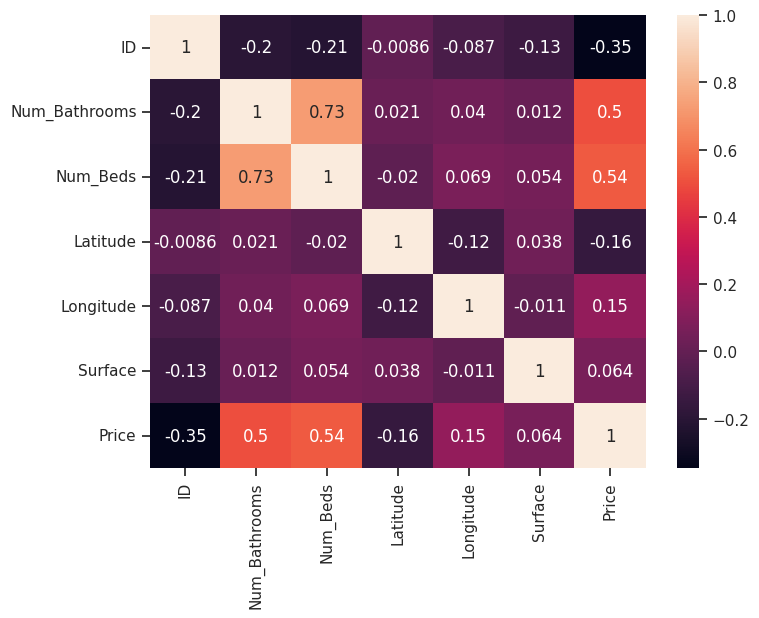

In [60]:
# check the correlcation matrix. It seems bathrooms and beds correlate highly with price.
sns.heatmap(df_train_subset[features].corr(), annot = True)
plt.show()

In [61]:
def plot_distribtion(df, feature):
    """
    Function plots the histogram and boxplot distribution of the feature side by side.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(f'{feature}')
    sns.histplot(ax=ax1, data=df, x=feature, kde=True)
    sns.boxplot(ax=ax2,data=df,  y=feature, palette="Set2")
    plt.show()

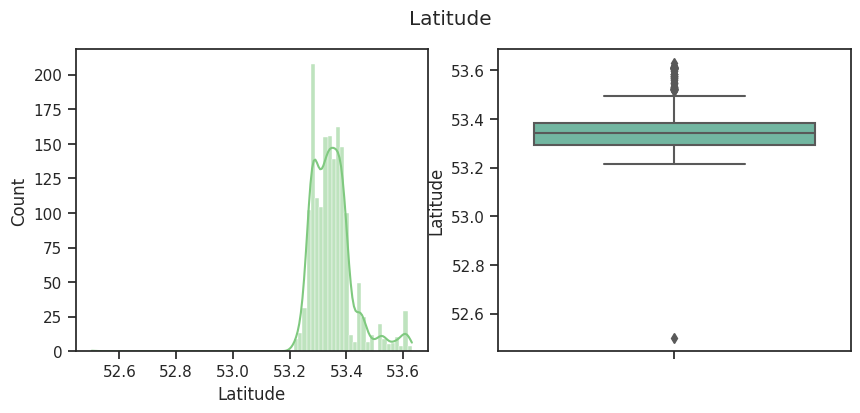

In [63]:
# lots of outliers exist in the longitudinal data
plot_distribtion(df_train_subset, 'Latitude')

In [65]:
# removing the outliers from the boxplot (outside of the whiskers)
from matplotlib.cbook import boxplot_stats

outliers = [y for stat in boxplot_stats(df_train_subset['Latitude']) for y in stat['fliers']]

In [67]:
#drop rows that contain any value outliers
df_train_subset = df_train_subset[df_train_subset.Latitude.isin(outliers) == False]

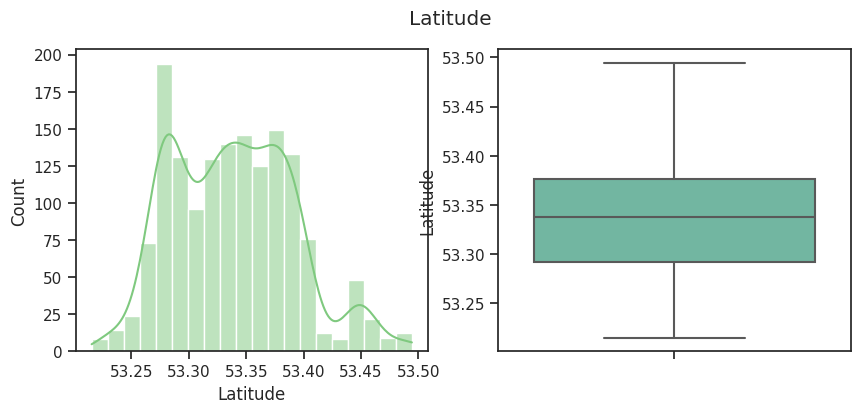

In [69]:
# plot again without outliers (distirbution is easier to plot)
plot_distribtion(df_train_subset, 'Latitude')

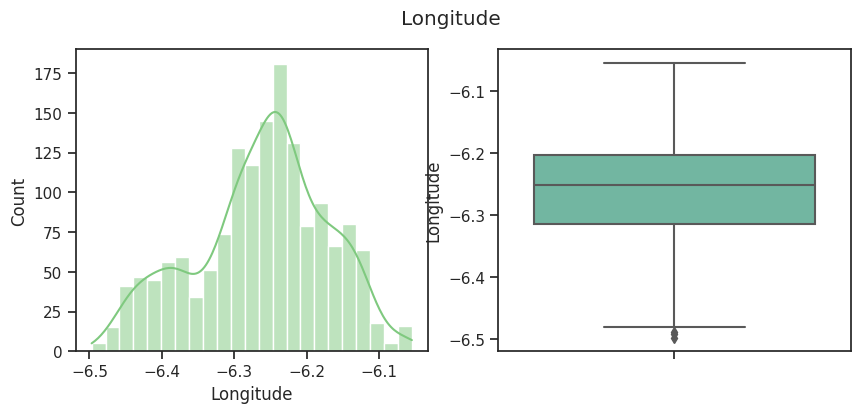

In [70]:
# longitude also looks fine.
plot_distribtion(df_train_subset, 'Longitude')

In [72]:
del features[-1]
df_test_subset = df_test[features]
df_test_subset.head()

,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface
0,12292473,2,2,53.316269,-6.243391,65.0
1,12314667,2,5,53.390769,-6.281936,142.0
2,11699240,1,2,53.272486,-6.108675,80.0
3,12416984,4,4,53.376932,-6.185334,209.0
4,12383407,2,3,53.327208,-6.308938,108.0


In [73]:
# double check no nulls in test set
show_nulls(df_test_subset)

,Number of Nulls,% of Nulls
ID,0,0.0
Num_Bathrooms,0,0.0
Num_Beds,0,0.0
Latitude,0,0.0
Longitude,0,0.0
Surface,0,0.0


### Prep data for modelling

In [75]:
Xs_train = df_train_subset.iloc[:,1:-1].values 
# train set, output column, cost
ys_train = df_train_subset.iloc[:,-1].values.reshape(-1,1)   

# test set, input columns
X_kaggle_test = df_test_subset.iloc[:,1:].values 
# test set, output column, cost

# StandardScaler() will normalize the features (we need a normal distribution for regression) i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1


In [78]:
# split data into training and test
from sklearn.model_selection import train_test_split

# training: 70% (0.7), test: 30% (0.3) 
# you could try any other combination 
# but consider 50% of training as the low boundary
X_train,X_test,y_train,y_test = train_test_split(Xs_train, ys_train, test_size=0.3)

In [80]:
sc = StandardScaler()

Xss_train = np.hstack([X_train,(X_train[:,[2]]*X_train[:,[3]])])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_test = np.hstack([X_test,(X_test[:,[2]]*X_test[:,[3]])])
Xn_test = xscaler.transform(Xss_test)

# log transform the target
ylog = np.log(y_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

# NATURAL LANGUAGE PROCESSING

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

Your comments, explanation, and references here.

In [ ]:
# your code here

# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

Your comments, explanation, and references here.

### KMeans clustering

In [82]:
# use k-means clustering to calculate the sum of the squared distances for k clusters
from sklearn import cluster

inertia = []
for k in range(1,15):
    clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=20, max_iter=500, random_state=10).fit(Xn_train)
    inertia.append(clustered_data_sklearn.inertia_)

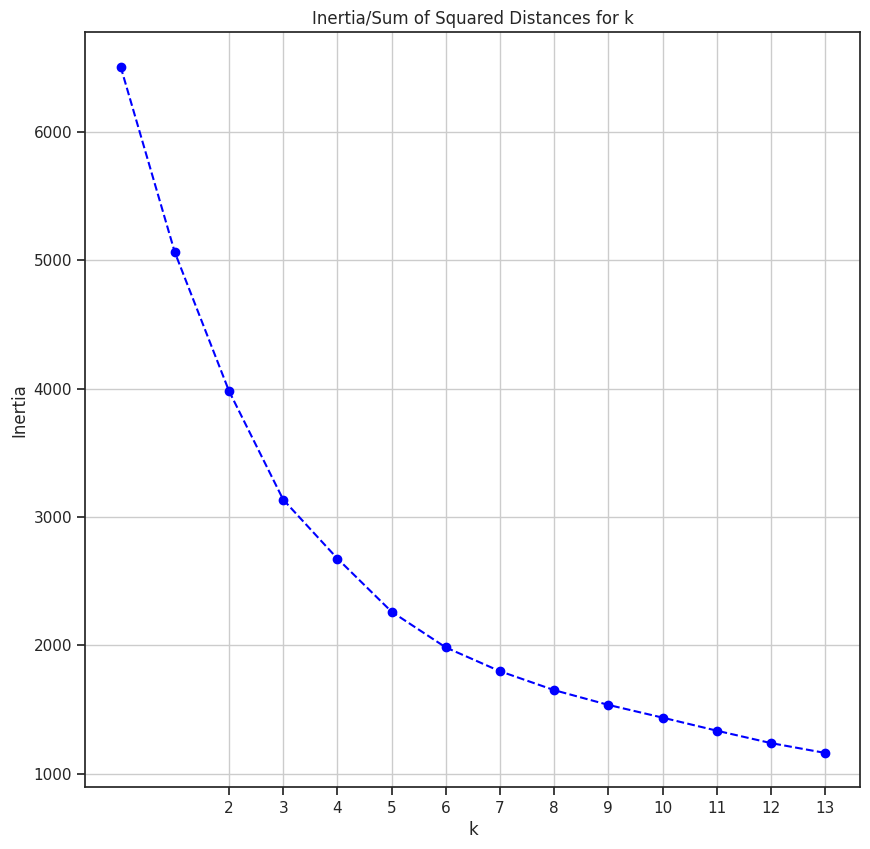

In [84]:
# plot to see if there is a clear elbow
plt.figure(figsize=(10,10))
plt.title('Inertia/Sum of Squared Distances for k')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.xticks(range(2, 30))
plt.grid()
plt.plot(inertia, linestyle='--', marker='o', color='b')
plt.show()

### Silhouette metric

In [85]:
from sklearn import metrics

silhouette_coefficients = []
   
# Start at 2 clusters for silhouette coefficient
for k in range(2, 15):
    clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=20, max_iter=500, random_state=10).fit(Xn_train)
    score = metrics.silhouette_score(Xn_train, clustered_data_sklearn.labels_)
    silhouette_coefficients.append(score)

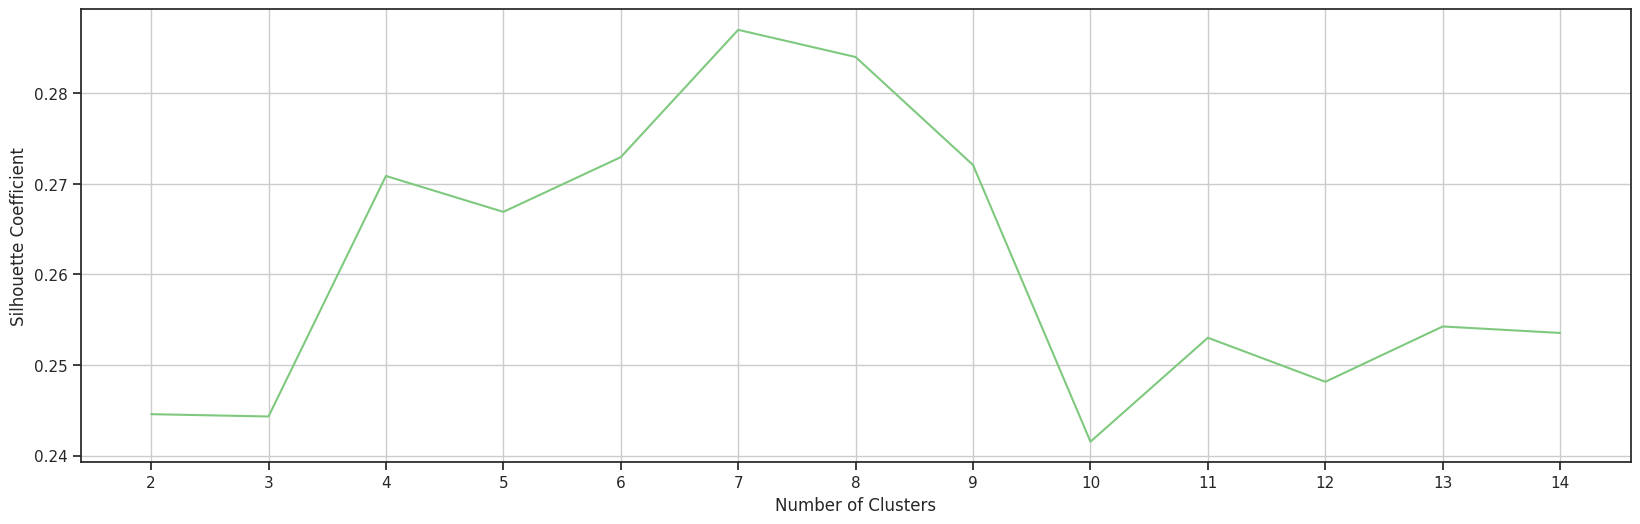

In [86]:
plt.figure(figsize=(20,6))
plt.plot(range(2,15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xticks()
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.grid()
plt.show()

It appears 7 clusters best represent the data from this plot.

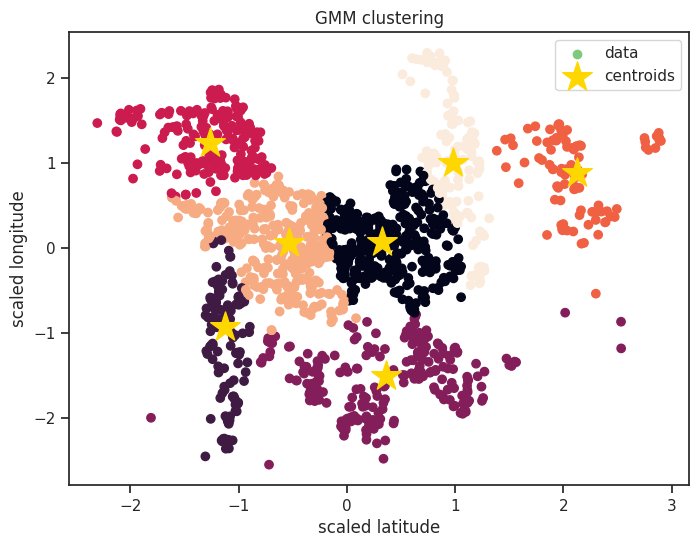

In [89]:
# training gaussian mixture model 
gmm = GaussianMixture(n_components=7)
# clustering by features 2, 3(lat-long)
ind=[2,3]
X_ind = np.vstack([Xn_train[:,ind],Xn_test[:,ind]])
# Gaussian Mixture
gmm.fit(X_ind)
labels = gmm.predict(X_ind)
# plot blue dots
plt.scatter(X_ind[:,0],X_ind[:,1], c = labels, label='data')
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1], c='gold', marker='*', s=500, label='centroids')
plt.title('GMM clustering')
plt.ylabel('scaled longitude')
plt.xlabel('scaled latitude')
plt.legend()
plt.show()

In [90]:
# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))

{0: 279, 1: 87, 2: 174, 3: 141, 4: 71, 5: 235, 6: 98}

In [91]:
# test clusters
clusters_test = gmm.predict(Xn_test[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))

{0: 128, 1: 36, 2: 64, 3: 56, 4: 31, 5: 105, 6: 45}

In [96]:
# create the training and target dataset for cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xtestn0 = Xn_test[clusters_test==0,:]

ylog0 = np.log(yn_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)

In [97]:
# create the training and target dataset for cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xtestn1 = Xn_test[clusters_test==1,:]
ylog1 = np.log(yn_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [98]:
# create the training and target dataset for cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xtestn2 = Xn_test[clusters_test==2,:]
ylog2 = np.log(yn_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)

In [99]:
# create the training and target dataset for cluster 3
Xn3 = Xn_train[clusters_train==3,:]
Xtestn3 = Xn_test[clusters_test==3,:]
ylog3 = np.log(yn_train.astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

In [100]:
# create the training and target dataset for cluster 4
Xn4 = Xn_train[clusters_train==4,:]
Xtestn4 = Xn_test[clusters_test==4,:]
ylog4 = np.log(yn_train.astype('float')[clusters_train==4,:])
yscaler4 = StandardScaler().fit(ylog4)
yn4 = yscaler4.transform(ylog4)

In [101]:
# create the training and target dataset for cluster 5
Xn5 = Xn_train[clusters_train==5,:]
Xtestn5 = Xn_test[clusters_test==5,:]
ylog5 = np.log(yn_train.astype('float')[clusters_train==5,:])
yscaler5 = StandardScaler().fit(ylog5)
yn5 = yscaler5.transform(ylog5)

In [102]:
# create the training and target dataset for cluster 7
Xn6 = Xn_train[clusters_train==6,:]
Xtestn6 = Xn_test[clusters_test==6,:]
ylog6 = np.log(yn_train.astype('float')[clusters_train==6,:])
yscaler6 = StandardScaler().fit(ylog6)
yn6 = yscaler6.transform(ylog6)

In [103]:
# look at the different scales of each cluster
print(yscaler0.scale_)
print(yscaler1.scale_)
print(yscaler2.scale_)
print(yscaler3.scale_)
print(yscaler4.scale_)
print(yscaler5.scale_)
print(yscaler6.scale_)

[1.60118289]
[1.35788294]
[1.56554524]
[1.19434913]
[1.74755328]
[1.34152959]
[1.59008002]


In [104]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])

with model_0:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior0 = approximation.sample(5000)

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Finished [100%]: Average Loss = 183.53


In [105]:
# model_1
with pm.Model() as model_1:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn1.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn1.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn1[:,0])

with model_1:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior1 = approximation.sample(5000)

Finished [100%]: Average Loss = 68.683


In [106]:
# model_2
with pm.Model() as model_2:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn2.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn2.T)
  # likelihood, be sure that observed is a 2d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn2[:,0])

with model_2:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior2 = approximation.sample(5000)

Finished [100%]: Average Loss = 108.76


In [107]:
# model_3
with pm.Model() as model_3:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn3.T)
  # likelihood, be sure that observed is a 3d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn3[:,0])

with model_3:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior3 = approximation.sample(5000)

Finished [100%]: Average Loss = 180.87


In [108]:
# model_4
with pm.Model() as model_4:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn4.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn4.T)
  # likelihood, be sure that observed is a 4d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn4[:,0])

with model_4:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior4 = approximation.sample(5000)

Finished [100%]: Average Loss = 85.188


In [109]:
# model_5
with pm.Model() as model_5:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn5.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn5.T)
  # likelihood, be sure that observed is a 5d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn5[:,0])

with model_5:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior5 = approximation.sample(5000)

Finished [100%]: Average Loss = 216.34


In [110]:
# model_6
with pm.Model() as model_6:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn6.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn6.T)
  # likelihood, be sure that observed is a 5d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn6[:,0])

with model_6:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior6 = approximation.sample(5000)

Finished [100%]: Average Loss = 76.552


### Simulations

In [113]:
# Simulations
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred

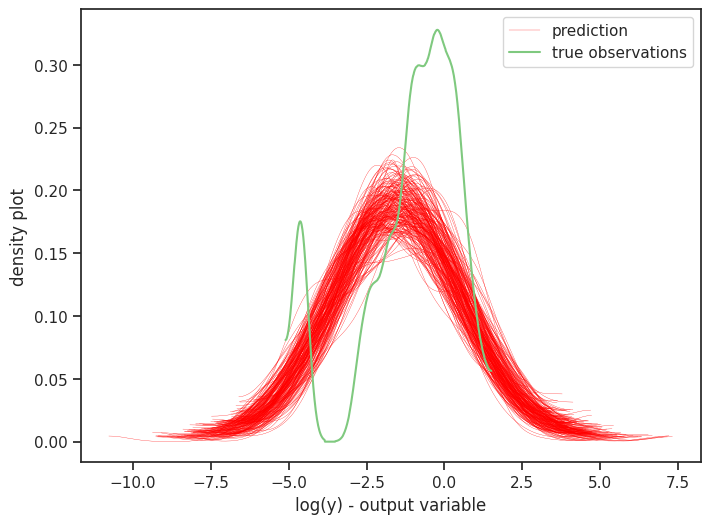

In [114]:
#Simulation
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))
for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog0,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

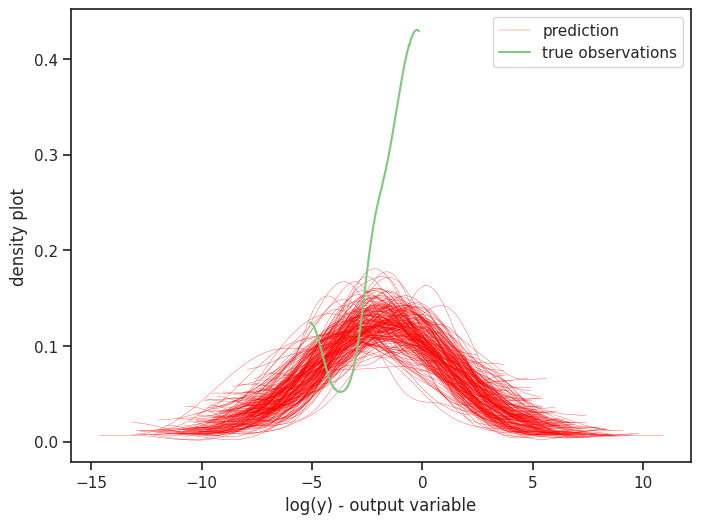

In [115]:
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))
for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog1,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

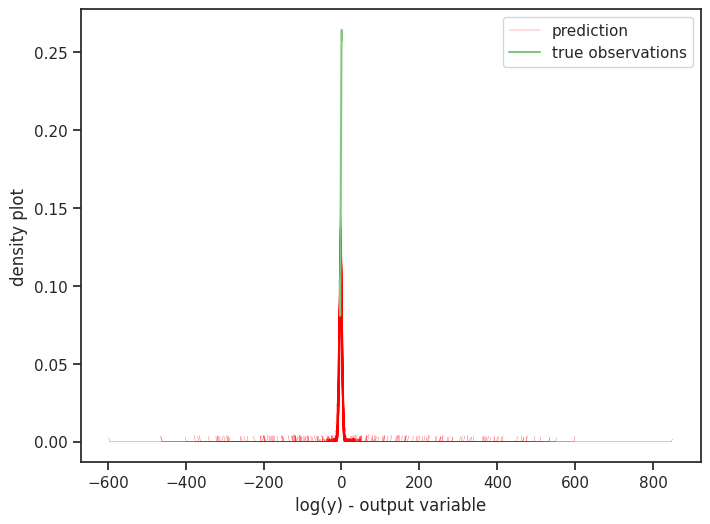

In [116]:
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior1['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))
for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog2,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

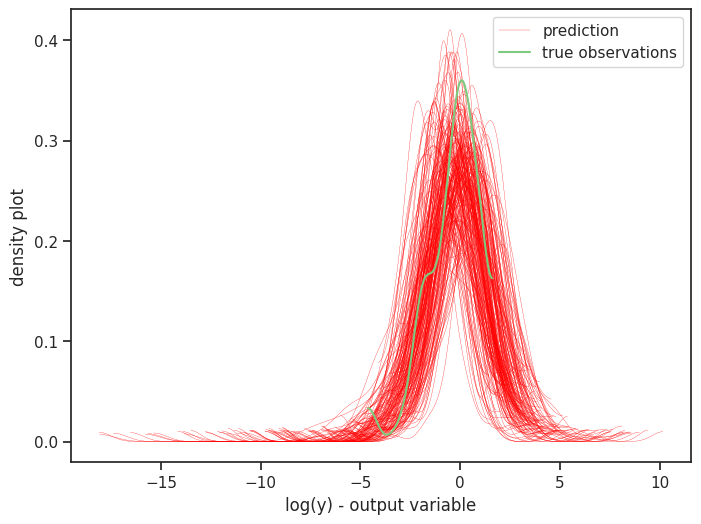

In [117]:
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior1['beta'],posterior3['sigma_n'],Xn3,  nsamples=200))
for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog3,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

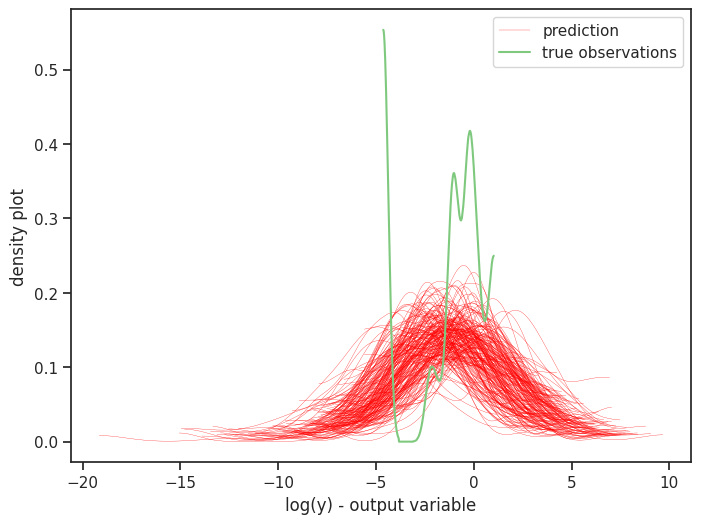

In [118]:
Ypred4 = yscaler4.inverse_transform(ppc(posterior4['alpha'],posterior1['beta'],posterior4['sigma_n'],Xn4,  nsamples=200))
for i in range(Ypred4.shape[0]):
    az.plot_dist( Ypred4[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred4[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog4,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

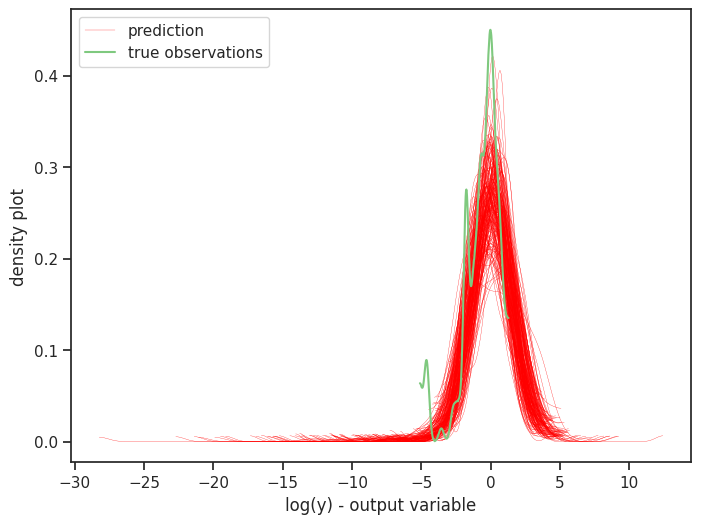

In [119]:
Ypred5 = yscaler5.inverse_transform(ppc(posterior5['alpha'],posterior1['beta'],posterior5['sigma_n'],Xn5,  nsamples=200))
for i in range(Ypred5.shape[0]):
    az.plot_dist( Ypred5[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred5[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog5,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

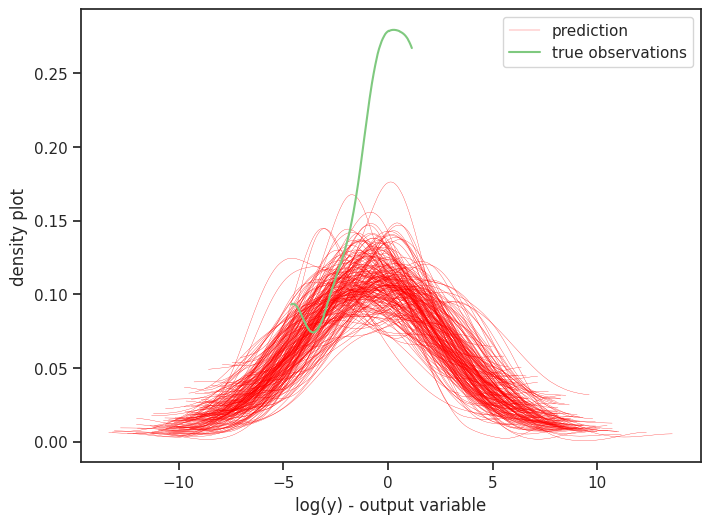

In [120]:
Ypred6 = yscaler6.inverse_transform(ppc(posterior6['alpha'],posterior1['beta'],posterior6['sigma_n'],Xn6,  nsamples=200))
for i in range(Ypred6.shape[0]):
    az.plot_dist( Ypred6[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred6[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog6,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

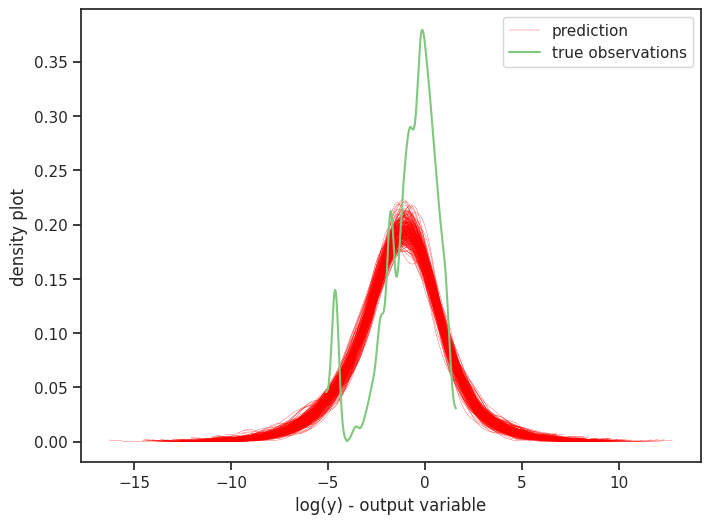

In [121]:
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)
Ypred4 = ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xn4,  nsamples=200)
Ypred5 = ppc(posterior5['alpha'],posterior5['beta'],posterior5['sigma_n'],Xn5,  nsamples=200)
Ypred6 = ppc(posterior6['alpha'],posterior6['beta'],posterior6['sigma_n'],Xn6,  nsamples=200)

# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3),
                 yscaler4.inverse_transform(Ypred4),
                 yscaler5.inverse_transform(Ypred5),
                 yscaler6.inverse_transform(Ypred6)])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([ylog0,ylog1,ylog2,ylog3, ylog4, ylog5, ylog6])
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

In [138]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))
print("Size Cluster0", np.sum(clusters_test==0), ", MAE Cluster0=",
      (np.mean(abs(y_pred_BLR0 - y_test[clusters_test==0]))))

# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))
print("Size Cluster1", np.sum(clusters_test==1), ", MAE Cluster1=",
      (np.mean(abs(y_pred_BLR1 - y_test[clusters_test==1]))))

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))
print("Size Cluster2", np.sum(clusters_test==2), ", MAE Cluster2=",
      (np.mean(abs(y_pred_BLR2 - y_test[clusters_test==2]))))

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))
print("Size Cluster3", np.sum(clusters_test==3), ", MAE Cluster3=",
      (np.mean(abs(y_pred_BLR3 - y_test[clusters_test==3]))))

# cluster 4
y_pred_BLR4 = np.exp(yscaler4.inverse_transform(np.mean(posterior4['alpha']) 
              + np.dot(np.mean(posterior4['beta'],axis=0), Xtestn4.T)))
print("Size Cluster4", np.sum(clusters_test==4), ", MAE Cluster4=",
      (np.mean(abs(y_pred_BLR4 - y_test[clusters_test==4]))))

# cluster 5
y_pred_BLR5 = np.exp(yscaler5.inverse_transform(np.mean(posterior5['alpha']) 
              + np.dot(np.mean(posterior5['beta'],axis=0), Xtestn5.T)))
print("Size Cluster5", np.sum(clusters_test==5), ", MAE Cluster5=",
      (np.mean(abs(y_pred_BLR5 - y_test[clusters_test==5]))))

y_pred_BLR6 = np.exp(yscaler6.inverse_transform(np.mean(posterior6['alpha']) 
              + np.dot(np.mean(posterior6['beta'],axis=0), Xtestn6.T)))
print("Size Cluster6", np.sum(clusters_test==6), ", MAE Cluster6=",
      (np.mean(abs(y_pred_BLR6 - y_test[clusters_test==6]))))

# joint
joint=np.hstack([abs(y_pred_BLR0 - y_test[clusters_test==0]),
                 abs(y_pred_BLR1 - y_test[clusters_test==1]),
                 abs(y_pred_BLR2 - y_test[clusters_test==2]),
                 abs(y_pred_BLR3 - y_test[clusters_test==3]),
                 abs(y_pred_BLR4 - y_test[clusters_test==4]),
                 abs(y_pred_BLR5 - y_test[clusters_test==5]),
                 abs(y_pred_BLR6 - y_test[clusters_test==6])])

joint_mape =np.hstack([abs(y_pred_BLR0 - y_test[clusters_test==0]) / y_test[clusters_test==0],
                 abs(y_pred_BLR1 - y_test[clusters_test==1]) / y_test[clusters_test==1],
                 abs(y_pred_BLR2 - y_test[clusters_test==2]) / y_test[clusters_test==2],
                 abs(y_pred_BLR3 - y_test[clusters_test==3]) / y_test[clusters_test==3],
                 abs(y_pred_BLR4 - y_test[clusters_test==4]) / y_test[clusters_test==4],
                 abs(y_pred_BLR5 - y_test[clusters_test==5]) / y_test[clusters_test==5],
                 abs(y_pred_BLR6 - y_test[clusters_test==6]) / y_test[clusters_test==6]])

# MAE
print("MAE=",np.mean(joint))
print("MAPE=",np.mean(joint_mape))

Size Cluster0 128 , MAE Cluster0= 478471.16697577905
Size Cluster1 36 , MAE Cluster1= 333083.1595050908
Size Cluster2 64 , MAE Cluster2= 395785.6362377779
Size Cluster3 56 , MAE Cluster3= 988622.9681328675
Size Cluster4 31 , MAE Cluster4= 654677.0166682631
Size Cluster5 105 , MAE Cluster5= 665989.5519094698
Size Cluster6 45 , MAE Cluster6= 458055.14919989585


ValueError: ignored

In [135]:
y_test[clusters_test==6].shape

(45, 1)

In [1]:
abs(y_pred_BLR0 - y_test[clusters_test==0]).shape

NameError: ignored

In [140]:
abs(y_pred_BLR1 - y_test[clusters_test==1])

array([[359999.69156524, 359999.7972599 , 359999.89788986, ...,
        359999.94757964, 359999.65893362, 359999.95208943],
       [454999.69156524, 454999.7972599 , 454999.89788986, ...,
        454999.94757964, 454999.65893362, 454999.95208943],
       [374999.69156524, 374999.7972599 , 374999.89788986, ...,
        374999.94757964, 374999.65893362, 374999.95208943],
       ...,
       [334999.69156524, 334999.7972599 , 334999.89788986, ...,
        334999.94757964, 334999.65893362, 334999.95208943],
       [574999.69156524, 574999.7972599 , 574999.89788986, ...,
        574999.94757964, 574999.65893362, 574999.95208943],
       [254999.69156524, 254999.7972599 , 254999.89788986, ...,
        254999.94757964, 254999.65893362, 254999.95208943]])

In [141]:
abs(y_pred_BLR2 - y_test[clusters_test==2])

array([[234999.8504749 , 234999.77484357, 234999.66263569, ...,
        234999.85005926, 234999.65219523, 234999.62340753],
       [249949.8504749 , 249949.77484357, 249949.66263569, ...,
        249949.85005926, 249949.65219523, 249949.62340753],
       [269999.8504749 , 269999.77484357, 269999.66263569, ...,
        269999.85005926, 269999.65219523, 269999.62340753],
       ...,
       [264999.8504749 , 264999.77484357, 264999.66263569, ...,
        264999.85005926, 264999.65219523, 264999.62340753],
       [274999.8504749 , 274999.77484357, 274999.66263569, ...,
        274999.85005926, 274999.65219523, 274999.62340753],
       [379999.8504749 , 379999.77484357, 379999.66263569, ...,
        379999.85005926, 379999.65219523, 379999.62340753]])

In [142]:
abs(y_pred_BLR3 - y_test[clusters_test==3])

array([[ 524999.64853697,  524998.95036403,  524997.4314755 , ...,
         524999.11029177,  524999.7032471 ,  524999.75563304],
       [1279999.64853697, 1279998.95036403, 1279997.4314755 , ...,
        1279999.11029177, 1279999.7032471 , 1279999.75563304],
       [7949999.64853697, 7949998.95036403, 7949997.4314755 , ...,
        7949999.11029177, 7949999.7032471 , 7949999.75563304],
       ...,
       [ 849999.64853697,  849998.95036403,  849997.4314755 , ...,
         849999.11029177,  849999.7032471 ,  849999.75563304],
       [ 314999.64853697,  314998.95036403,  314997.4314755 , ...,
         314999.11029177,  314999.7032471 ,  314999.75563304],
       [ 234999.64853697,  234998.95036403,  234997.4314755 , ...,
         234999.11029177,  234999.7032471 ,  234999.75563304]])

In [149]:
abs(y_pred_BLR4 - y_test[clusters_test==4]).shape

(31, 31)

In [148]:
abs(y_pred_BLR5 - y_test[clusters_test==5]).shape

(105, 105)

In [147]:
abs(y_pred_BLR6 - y_test[clusters_test==6]).shape

(45, 45)

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

In [ ]:
# your code here

# SUMMARY

Your summary here.